In [1]:
import os               # import os to walk file path
import pandas as pd     # import pandas for dataframes
import numpy as np      
import json

In [2]:
# Relative path
path_to_data = 'rssDevData/'

# Names of 5 blog categories to import 
blogs = ['DavidWalsh','DeveloperDotCom']

# Identify key to blog text in JSON file
key = 'text'

# Initialize empty data frame
text_data = pd.DataFrame()

#Initialize counter to keep track of files that fail
files_not_read = 0

category_sizes = [] # To store number of blog articles by category
labels = [] # To store "true" labels ->  [0, 1, 2, 3, 4]
label = 0

for blog in blogs :
    current_blog_category_count = 0
    
    path_to_blogs = path_to_data + blog 
    
    for root, dir, files in os.walk(path_to_blogs) :
        # get list of only json files
        json_files = [pos_json for pos_json in files if pos_json.endswith('.json')]

        for j in json_files :
            with open(root + '/' + j, 'r') as f:
                try:
                    data = json.load(f)
                    if len(data[key]) > 200 :
                        try : # fails when there is more than one json object in the file 
                            text_data = pd.concat([text_data, pd.DataFrame(data, index=[0])], ignore_index=True) 
                            current_blog_category_count += 1 
                            labels.append(label) 
                        except : 
                            files_not_read += 1
                except:
                    print(j)
print('Files not read in: ', str(files_not_read))
print('Files read in: ', str(len(text_data)))
print(text_data.head())

5-web-design-trends-.json
locate-empty-directo.json
overview-of-spiral-s.json
Files not read in:  0
Files read in:  27
                                     header_title  \
0   Convert Fahrenheit to Celsius with JavaScript   
1     Create a Thumbnail From a Video with ffmpeg   
2                      CSS ::file-selector-button   
3                Customizing HTML Form Validation   
4  Detect Browser Bars Visibility with JavaScript   

                              date  \
0  Wed, 26 Oct 2022 10:19:49 +0000   
1  Tue, 25 Oct 2022 09:28:58 +0000   
2  Mon, 20 Feb 2023 09:50:57 +0000   
3  Mon, 09 Jan 2023 10:57:00 +0000   
4  Fri, 30 Dec 2022 01:36:35 +0000   

                                                text  \
0  The United States is one of the last bodies th...   
1  Creating a thumbnail to represent a video is a...   
2  We all love beautifully styled form controls b...   
3  Form validation has always been my least favor...   
4  It's one thing to know about what's in the bro... 

In [3]:
text_data.head()

,header_title,date,text,summary,url
0,Convert Fahrenheit to Celsius with JavaScript,"Wed, 26 Oct 2022 10:19:49 +0000",The United States is one of the last bodies th...,The article discusses the importance of provid...,https://davidwalsh.name/fahrenheit-celsius-jav...
1,Create a Thumbnail From a Video with ffmpeg,"Tue, 25 Oct 2022 09:28:58 +0000",Creating a thumbnail to represent a video is a...,The article discusses several topics related t...,https://davidwalsh.name/create-thumbnail-ffmpeg
2,CSS ::file-selector-button,"Mon, 20 Feb 2023 09:50:57 +0000",We all love beautifully styled form controls b...,This article discusses various web development...,https://davidwalsh.name/css-file-selector-button
3,Customizing HTML Form Validation,"Mon, 09 Jan 2023 10:57:00 +0000",Form validation has always been my least favor...,The article discusses how to control native fo...,https://davidwalsh.name/html5-validation
4,Detect Browser Bars Visibility with JavaScript,"Fri, 30 Dec 2022 01:36:35 +0000",It's one thing to know about what's in the bro...,The article discusses how developers can gain ...,https://davidwalsh.name/detect-browser-bars


https://www.kaggle.com/code/thomaslazarus/summarization-comparison

In [4]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, AutoModelWithLMHead
import torch
import time

In [5]:
import transformers
print(transformers.__version__)

4.28.1


# T5

In [6]:
model = AutoModelForSeq2SeqLM.from_pretrained('t5-base')

In [7]:
tokenizer = AutoTokenizer.from_pretrained("t5-base")

C:\Users\msalehi\AppData\Roaming\Python\Python39\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [8]:
def T5(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_T5 = tokenizer.decode(outputs[0])
    end = time.time()
    t5_time = (end - start)
#     print(t5_time)
    return(t5_time, decoded_T5)

In [9]:
T5(text_data.iloc[20]['text'])[1]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


'<pad> machine vision has come a long way since the days of â<unk>how can a computer recognize this image as an apple?â<unk>. Optical character recognition (OCR) takes this a step further, by allowing developers to extract the text presented in an image. extracting the text would allow for the text to be indexable and searchable.</s>'

In [10]:
text_data['T5']= text_data['text'].apply(lambda x:T5(x))

In [11]:
# text_data['T5'][20][1]

# BERT

In [12]:
model = AutoModelWithLMHead.from_pretrained('bert-base-cased')

C:\Users\msalehi\AppData\Roaming\Python\Python39\site-packages\transformers\models\auto\modeling_auto.py:1322: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSe

In [13]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [14]:
def BERT(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=100)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_BERT = tokenizer.decode(outputs[0])
    end = time.time()
    BERT_time = (end-start)
    return(BERT_time, decoded_BERT)

In [15]:
# text_data.head()

In [16]:
text_data['BERT']= text_data['text'].apply(lambda x:BERT(x))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


# GPT

In [17]:
model = AutoModelWithLMHead.from_pretrained('openai-gpt')
tokenizer = AutoTokenizer.from_pretrained("openai-gpt")

C:\Users\msalehi\AppData\Roaming\Python\Python39\site-packages\transformers\models\auto\modeling_auto.py:1322: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [18]:
def GPT(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=149)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_GPT = tokenizer.decode(outputs[0])
    end = time.time()
    GPT_time = (end - start)
    return(GPT_time, decoded_GPT)

In [19]:
text_data['GPT']= text_data['text'].apply(lambda x:GPT(x))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


# DistilBERT

In [20]:
model = AutoModelWithLMHead.from_pretrained('distilgpt2')
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

C:\Users\msalehi\AppData\Roaming\Python\Python39\site-packages\transformers\models\auto\modeling_auto.py:1322: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [21]:
def DistilBERT(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=149)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_DistilBERT = tokenizer.decode(outputs[0])
    end = time.time()
    DistilBERT_time = (end - start)
    return(DistilBERT_time, decoded_DistilBERT)

In [22]:
text_data['DistilBERT']= text_data['text'].apply(lambda x:DistilBERT(x))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your

# GPT2

In [23]:
model = AutoModelWithLMHead.from_pretrained('gpt2')
tokenizer = AutoTokenizer.from_pretrained("gpt2")

C:\Users\msalehi\AppData\Roaming\Python\Python39\site-packages\transformers\models\auto\modeling_auto.py:1322: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [24]:
def GPT2(text):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + text_data.iloc[20]['text'], return_tensors="pt", max_length=149)
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_GPT2 = tokenizer.decode(outputs[0])
    end = time.time()
    GPT2_time = (end - start)
    return(GPT2_time, decoded_GPT2)

In [25]:
text_data['GPT2']= text_data['text'].apply(lambda x:GPT2(x))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your

In [26]:
text_data['BERT'][0][0]

52.163445472717285

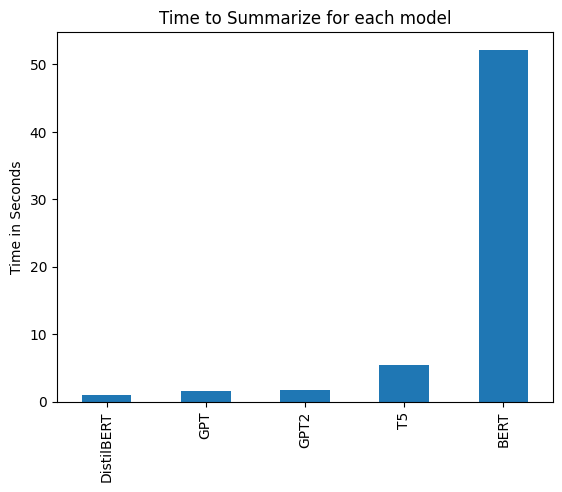

In [27]:
# Create a bar plot to display time of summarization for each model

import matplotlib.pyplot as plot
time_array = {'Model': ["BERT", "T5", "DistilBERT", "GPT", "GPT2"],
            'Times': [text_data['BERT'][0][0], text_data['T5'][0][0], text_data['DistilBERT'][0][0], text_data['GPT'][0][0],
                    text_data['GPT2'][0][0]]}
df_time = pd.DataFrame(data=time_array)
df_time.sort_values('Times').plot.bar(
    x="Model", y="Times", title="Time to Summarize for each model", ylabel="Time in Seconds", xlabel="", legend=False)
plot.show()

In [28]:
len(text_data['BERT'][0][1])

512

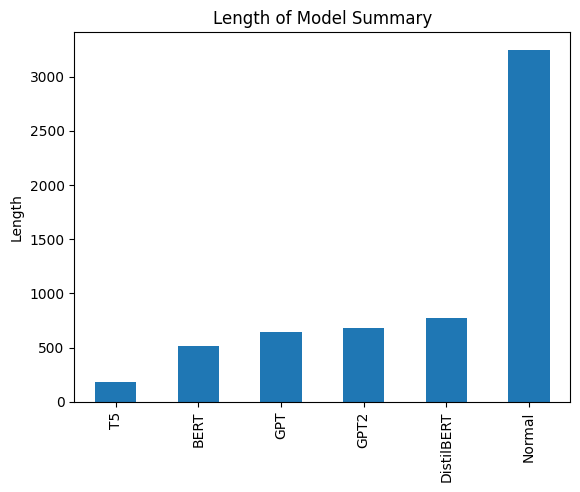

In [29]:
# Create a bar plot to display length of summary for each model

length_dict = {"Model": ["Normal", "BERT", "T5", "DistilBERT", "GPT", "GPT2"], 
               "Length": [(len(text_data['text'][0])), (len(text_data['BERT'][0][1])), (len(text_data['T5'][0][1])), 
                          (len(text_data['DistilBERT'][0][1])), (len(text_data['GPT'][0][1])), (len(text_data['GPT2'][0][1]))]}
                          
df_length = pd.DataFrame(data=length_dict)
df_length.sort_values('Length').plot.bar(x="Model", y="Length", title="Length of Model Summary", ylabel="Length", xlabel="", legend=False)
plot.show()

## Rouge Score

In [30]:
from rouge import Rouge

In [31]:
text_data['T5_list'] = [x[1] for x in text_data['T5']]

In [32]:
rouge = Rouge()

# Compare chatgpt summary with T5 using Rouge measure

scores1 = rouge.get_scores(text_data["summary"], text_data['T5_list'])
df_result1 = pd.DataFrame(scores1)
df_result1.head()

,rouge-1,rouge-2,rouge-l
0,"{'r': 0.35294117647058826, 'p': 0.076923076923...","{'r': 0.11764705882352941, 'p': 0.018867924528...","{'r': 0.35294117647058826, 'p': 0.076923076923..."
1,"{'r': 0.4444444444444444, 'p': 0.2077922077922...","{'r': 0.2, 'p': 0.06422018348623854, 'f': 0.09...","{'r': 0.3888888888888889, 'p': 0.1818181818181..."
2,"{'r': 0.2413793103448276, 'p': 0.0958904109589...","{'r': 0.034482758620689655, 'p': 0.01123595505...","{'r': 0.2413793103448276, 'p': 0.0958904109589..."
3,"{'r': 0.5294117647058824, 'p': 0.2608695652173...","{'r': 0.08108108108108109, 'p': 0.03, 'f': 0.0...","{'r': 0.4411764705882353, 'p': 0.2173913043478..."
4,"{'r': 0.41935483870967744, 'p': 0.175675675675...","{'r': 0.125, 'p': 0.041666666666666664, 'f': 0...","{'r': 0.41935483870967744, 'p': 0.175675675675..."


In [33]:
text_data['BERT_list'] = [x[1] for x in text_data['BERT']]

In [34]:
# Compare chatgpt summary with BERT using Rouge measure

scores2 = rouge.get_scores(text_data["summary"], text_data["BERT_list"])
df_result2 = pd.DataFrame(scores2)
# df_result2.head()

In [35]:
text_data['DistilBERT_list'] = [x[1] for x in text_data['DistilBERT']]

In [36]:
# Compare chatgpt summary with DistilBERT using Rouge measure

scores3 = rouge.get_scores(text_data["summary"], text_data["DistilBERT_list"])
df_result3 = pd.DataFrame(scores3)
# df_result3.head()

In [37]:
text_data['GPT_list'] = [x[1] for x in text_data['GPT']]

In [38]:
# # Compare chatgpt summary with GPT using Rouge measure

scores4 = rouge.get_scores(text_data["summary"], text_data["GPT_list"])
df_result4 = pd.DataFrame(scores4)
# df_result4.head()

In [39]:
text_data['GPT2_list'] = [x[1] for x in text_data['GPT2']]

In [40]:
# Compare chatgpt summary with GPT2 using Rouge measure

scores5 = rouge.get_scores(text_data["summary"], text_data["GPT2_list"])
df_result5 = pd.DataFrame(scores5)
# df_result5.head()

In [41]:
# Create a dataframe and Calculate the mean value of Rouge measure for T5

f_rouge_1_T5 = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result1)):
    r = df_result1['rouge-1'][i]['f']
    f_rouge_1_T5.append(r)
    k = df_result1['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result1['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [42]:
# Create a dataframe and Calculate the mean value of Rouge measure for BERT

f_rouge_1_BERT = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result2)):
    r = df_result2['rouge-1'][i]['f']
    f_rouge_1_BERT.append(r)
    k = df_result2['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result2['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [43]:
# Create a dataframe and Calculate the mean value of Rouge measure for DistilBERT

f_rouge_1_DistilBERT = []
f_rouge_2_DistilBERT = []
f_rouge_l_DistilBERT = []

for i in range(len(df_result3)):
    r = df_result3['rouge-1'][i]['f']
    f_rouge_1_DistilBERT.append(r)
    k = df_result3['rouge-2'][i]['f']
    f_rouge_2_DistilBERT.append(k)
    h = df_result3['rouge-l'][i]['f']
    f_rouge_l_DistilBERT.append(h)

In [44]:
# Create a dataframe and Calculate the mean value of Rouge measure for GPT

f_rouge_1_GPT = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result4)):
    r = df_result4['rouge-1'][i]['f']
    f_rouge_1_GPT.append(r)
    k = df_result4['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result4['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [45]:
# Create a dataframe and Calculate the mean value of Rouge measure for GPT2

f_rouge_1_GPT2 = []
f_rouge_2 = []
f_rouge_l = []

for i in range(len(df_result5)):
    r = df_result5['rouge-1'][i]['f']
    f_rouge_1_GPT2.append(r)
    k = df_result5['rouge-2'][i]['f']
    f_rouge_2.append(k)
    h = df_result5['rouge-l'][i]['f']
    f_rouge_l.append(h)

In [46]:
# Create a dataframe of f_rouge for all methods for each row

data = {'f_rouge_1_T5':f_rouge_1_T5,'f_rouge_1_BERT':f_rouge_1_BERT
        ,'f_rouge_1_GPT':f_rouge_1_GPT, 'f_rouge_1_DistilBERT':f_rouge_1_DistilBERT,'f_rouge_1_GPT2': f_rouge_1_GPT2}
# columns = ['f_rouge_1_LexRank','f_rouge_1_Lsa','f_rouge_1_TextRank','f_rouge_1_Luhn']
df =pd.DataFrame(data)
df.head()

,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2
0,0.126316,0.237037,0.172662,0.251572,0.141935
1,0.283186,0.210526,0.226415,0.230769,0.168831
2,0.137255,0.205479,0.219355,0.236842,0.173333
3,0.349515,0.246575,0.293333,0.324675,0.205479
4,0.247619,0.323077,0.367089,0.379747,0.211921


In [47]:
# Statistical info of df

df.describe()

,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.263029,0.302204,0.314796,0.348331,0.174475
std,0.082388,0.062196,0.074693,0.084041,0.045971
min,0.119048,0.163934,0.172662,0.230769,0.112676
25%,0.197332,0.263278,0.270180,0.281018,0.148360
50%,0.272727,0.312057,0.297619,0.335329,0.166667
75%,0.321042,0.332080,0.359601,0.413415,0.188799
max,0.390244,0.432432,0.459627,0.530864,0.358974


In [48]:
# Import libraries for visualization

import seaborn as sns
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'f_rouge_1_T5'),
  Text(1, 0, 'f_rouge_1_BERT'),
  Text(2, 0, 'f_rouge_1_GPT'),
  Text(3, 0, 'f_rouge_1_DistilBERT'),
  Text(4, 0, 'f_rouge_1_GPT2')])

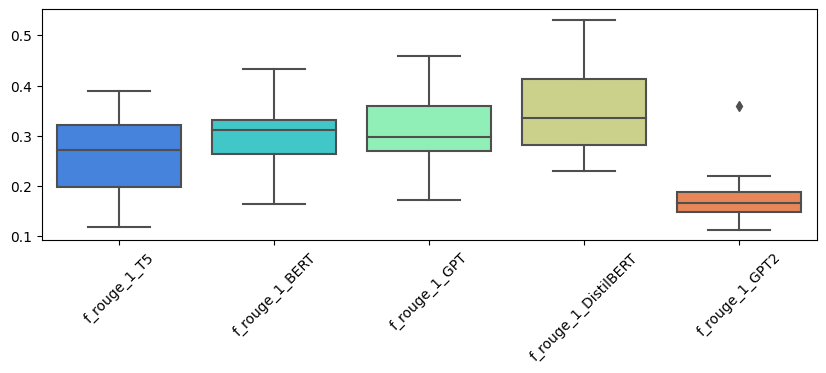

In [49]:
# Create a boxplot for different methods

plt.figure(figsize=(10, 3))
sns.boxplot(data=df, palette='rainbow')
plt.xticks(rotation=45)

### The figure above illustrates that DistilBERT provides the best value in comparison with other methods

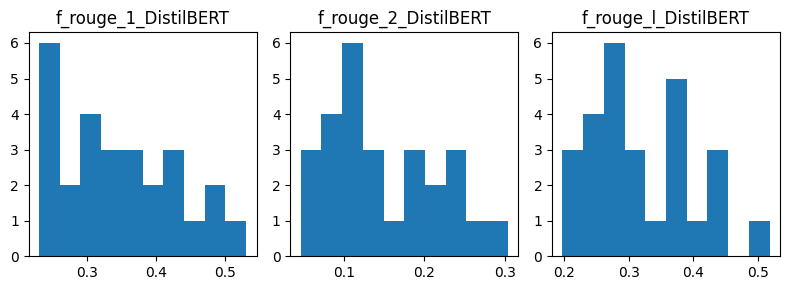

In [50]:
# Create histogram to display the distribution of f_rouge for DistilBERT method

plt.figure(figsize=(8, 3))

plt.subplot(1,3,1)
plt.hist(f_rouge_1_DistilBERT, bins = 10)
plt.title('f_rouge_1_DistilBERT')

plt.subplot(1,3,2)
plt.hist(f_rouge_2_DistilBERT, bins = 10)
plt.title('f_rouge_2_DistilBERT')

plt.subplot(1,3,3)
plt.hist(f_rouge_l_DistilBERT, bins = 10)
plt.title('f_rouge_l_DistilBERT')

plt.tight_layout()

## BERT Score

In [51]:
from evaluate import load
bertscore = load("bertscore")

In [52]:
text_data.head()

,header_title,date,text,summary,url,T5,BERT,GPT,DistilBERT,GPT2,T5_list,BERT_list,DistilBERT_list,GPT_list,GPT2_list
0,Convert Fahrenheit to Celsius with JavaScript,"Wed, 26 Oct 2022 10:19:49 +0000",The United States is one of the last bodies th...,The article discusses the importance of provid...,https://davidwalsh.name/fahrenheit-celsius-jav...,"(5.42238450050354, <pad> if you code for users...","(52.163445472717285, [CLS] summarize : The Uni...","(1.5695433616638184, summarize : the united st...","(0.9350848197937012, summarize: The United Sta...","(1.6728148460388184, summarize: Machine Vision...","<pad> if you code for users outside the us, it...",[CLS] summarize : The United States is one of ...,summarize: The United States is one of the las...,summarize : the united states is one of the la...,summarize: Machine Vision has come a long way ...
1,Create a Thumbnail From a Video with ffmpeg,"Tue, 25 Oct 2022 09:28:58 +0000",Creating a thumbnail to represent a video is a...,The article discusses several topics related t...,https://davidwalsh.name/create-thumbnail-ffmpeg,"(6.358744382858276, <pad> developers can use <...","(50.48307228088379, [CLS] summarize : Creating...","(1.6462671756744385, summarize : creating a th...","(0.9762015342712402, summarize: Creating a thu...","(1.73368239402771, summarize: Machine Vision h...","<pad> developers can use <unk>ffmpeg, an incre...",[CLS] summarize : Creating a thumbnail to repr...,summarize: Creating a thumbnail to represent a...,summarize : creating a thumbnail to represent ...,summarize: Machine Vision has come a long way ...
2,CSS ::file-selector-button,"Mon, 20 Feb 2023 09:50:57 +0000",We all love beautifully styled form controls b...,This article discusses various web development...,https://davidwalsh.name/css-file-selector-button,"(5.27102518081665, <pad> we've created scores ...","(51.09872889518738, [CLS] summarize : We all l...","(1.6300573348999023, summarize : we all love b...","(0.9570868015289307, summarize: We all love be...","(1.7306125164031982, summarize: Machine Vision...",<pad> we've created scores of libraries to moc...,[CLS] summarize : We all love beautifully styl...,summarize: We all love beautifully styled form...,summarize : we all love beautifully styled for...,summarize: Machine Vision has come a long way ...
3,Customizing HTML Form Validation,"Mon, 09 Jan 2023 10:57:00 +0000",Form validation has always been my least favor...,The article discusses how to control native fo...,https://davidwalsh.name/html5-validation,"(6.283862352371216, <pad> to aid form validati...","(50.45256972312927, [CLS] summarize : Form val...","(1.6759555339813232, summarize : form validati...","(0.9566423892974854, summarize: Form validatio...","(1.7585055828094482, summarize: Machine Vision...","<pad> to aid form validation, the HTML spec ad...",[CLS] summarize : Form validation has always b...,summarize: Form validation has always been my ...,summarize : form validation has always been my...,summarize: Machine Vision has come a long way ...
4,Detect Browser Bars Visibility with JavaScript,"Fri, 30 Dec 2022 01:36:35 +0000",It's one thing to know about what's in the bro...,The article discusses how developers can gain ...,https://davidwalsh.name/detect-browser-bars,"(6.435425043106079, <pad> we've gotten past de...","(54.17764449119568, [CLS] summarize : It's one...","(1.648467779159546, summarize : it's one thing...","(0.9654176235198975, summarize: It's one thing...","(1.7511141300201416, summarize: Machine Vision...",<pad> we've gotten past detecting which browse...,[CLS] summarize : It's one thing to know about...,summarize: It's one thing to know about what's...,summarize : it's one thing to know about what'...,summarize: Machine Vision has come a long way ...


In [53]:
refs = text_data['summary']
cands=text_data['T5_list']
results_T5 = bertscore.compute(predictions=cands, references=refs, lang="en")

In [54]:
print('BERT SCORE results_T5')
print('Precision',np.mean(results_T5['precision']))
print('Recall',np.mean(results_T5['recall']))
print('F1',np.mean(results_T5['f1']))

BERT SCORE results_T5
Precision 0.8829717503653632
Recall 0.8429913300055044
F1 0.8623946993439285


In [55]:
refs = text_data['summary']
cands=text_data['BERT_list']
results_BERT = bertscore.compute(predictions=cands, references=refs, lang="en")

In [56]:
refs = text_data['summary']
cands=text_data['GPT_list']
results_GPT = bertscore.compute(predictions=cands, references=refs, lang="en")

In [57]:
refs = text_data['summary']
cands=text_data['DistilBERT_list']
results_DistilBERT = bertscore.compute(predictions=cands, references=refs, lang="en")

In [58]:
refs = text_data['summary']
cands=text_data['GPT2_list']
results_GPT2 = bertscore.compute(predictions=cands, references=refs, lang="en")

In [59]:
# Create a dataframe of f_rouge for all methods for each row

data = {'f_BERT_T5':results_T5['f1'],'f_BERT_BERT':results_BERT['f1'],'f_BERT_GPT':results_GPT['f1'],
        'f_BERT_DistilBERT':results_DistilBERT['f1'],'f_BERT_GPT2':results_GPT2['f1']}
df_BERT =pd.DataFrame(data)
df_BERT.head()

,f_BERT_T5,f_BERT_BERT,f_BERT_GPT,f_BERT_DistilBERT,f_BERT_GPT2
0,0.842560,0.820881,0.846035,0.855112,0.821185
1,0.860000,0.842118,0.850451,0.851598,0.831825
2,0.842796,0.841915,0.853566,0.860874,0.829670
3,0.861604,0.847483,0.850310,0.853325,0.829950
4,0.854034,0.828173,0.868924,0.871419,0.821374


In [60]:
df_BERT.describe()

,f_BERT_T5,f_BERT_BERT,f_BERT_GPT,f_BERT_DistilBERT,f_BERT_GPT2
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.862395,0.839806,0.858786,0.864939,0.824281
std,0.017736,0.018049,0.016663,0.019604,0.008669
min,0.826378,0.804117,0.834249,0.834245,0.808459
25%,0.854885,0.828382,0.848487,0.851622,0.820316
50%,0.862170,0.841915,0.856619,0.861614,0.823373
75%,0.873608,0.849900,0.866833,0.879073,0.829174
max,0.889936,0.870504,0.896285,0.902698,0.852741


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'f_BERT_T5'),
  Text(1, 0, 'f_BERT_BERT'),
  Text(2, 0, 'f_BERT_GPT'),
  Text(3, 0, 'f_BERT_DistilBERT'),
  Text(4, 0, 'f_BERT_GPT2')])

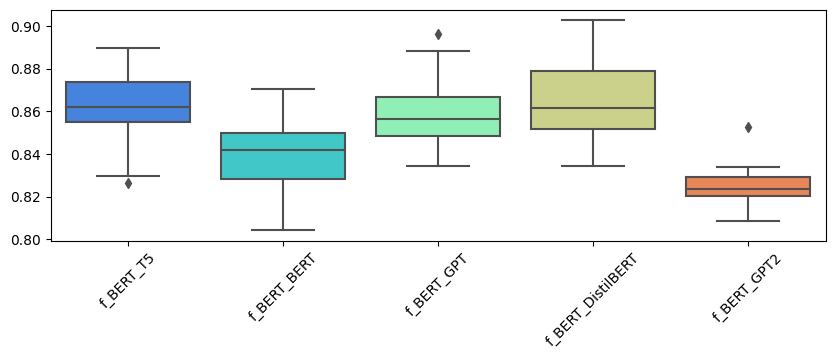

In [61]:
# Create a boxplot for different methods

plt.figure(figsize=(10, 3))
sns.boxplot(data=df_BERT, palette='rainbow')
plt.xticks(rotation=45)

## BLEU Score

https://www.kaggle.com/code/vshantam/text-summarization-extractive-bleu

In [62]:
import nltk

In [63]:
refs = text_data['summary'][0]
cands=text_data['T5_list'][0]
BLEUscore = nltk.translate.bleu_score.sentence_bleu([refs], cands)
print(f"BLEUscore : {BLEUscore}")

BLEUscore : 0.023043616212982957


In [64]:
BLEUscore_T5 = []
BLEUscore_BERT = []
BLEUscore_GPT = []
BLEUscore_DistilBERT = []
BLEUscore_GPT2 = []


for i in range(len(text_data)):
    B_T5 = nltk.translate.bleu_score.sentence_bleu([text_data['summary'][i]], text_data['T5_list'][i])
    BLEUscore_T5.append(B_T5)
    
    B_BERT = nltk.translate.bleu_score.sentence_bleu([text_data['summary'][i]], text_data['BERT_list'][i])
    BLEUscore_BERT.append(B_BERT)
    
    B_GPT = nltk.translate.bleu_score.sentence_bleu([text_data['summary'][i]], text_data['GPT_list'][i])
    BLEUscore_GPT.append(B_GPT)
    
    B_DistilBERT = nltk.translate.bleu_score.sentence_bleu([text_data['summary'][i]], text_data['DistilBERT_list'][i])
    BLEUscore_DistilBERT.append(B_DistilBERT)
    
    B_GPT2 = nltk.translate.bleu_score.sentence_bleu([text_data['summary'][i]], text_data['GPT2_list'][i])
    BLEUscore_GPT2.append(B_GPT2)

# Create a dataframe of BLEU Score for all methods for each row

data = {'BLEUscore_T5':BLEUscore_T5,'BLEUscore_BERT':BLEUscore_BERT,'BLEUscore_GPT':BLEUscore_GPT,
        'BLEUscore_DistilBERT':BLEUscore_DistilBERT,'BLEUscore_GPT2':BLEUscore_GPT2}
df_BLEU =pd.DataFrame(data)
df_BLEU.head()

,BLEUscore_T5,BLEUscore_BERT,BLEUscore_GPT,BLEUscore_DistilBERT,BLEUscore_GPT2
0,0.023044,0.314510,0.436869,0.501115,0.342012
1,0.075297,0.358594,0.432232,0.432322,0.390285
2,0.049509,0.388729,0.446903,0.473102,0.401916
3,0.089733,0.456167,0.502915,0.505182,0.399480
4,0.074834,0.427220,0.606702,0.610008,0.370522


In [65]:
df_BLEU.describe()

,BLEUscore_T5,BLEUscore_BERT,BLEUscore_GPT,BLEUscore_DistilBERT,BLEUscore_GPT2
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.085965,0.393092,0.488040,0.508758,0.364664
std,0.042370,0.075297,0.072504,0.077095,0.053742
min,0.023044,0.249566,0.324856,0.304549,0.218113
25%,0.062519,0.344533,0.438274,0.466045,0.352424
50%,0.073368,0.398840,0.500045,0.498759,0.373321
75%,0.100625,0.438617,0.535035,0.556140,0.390711
max,0.193028,0.553445,0.606702,0.642473,0.466385


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BLEUscore_T5'),
  Text(1, 0, 'BLEUscore_BERT'),
  Text(2, 0, 'BLEUscore_GPT'),
  Text(3, 0, 'BLEUscore_DistilBERT'),
  Text(4, 0, 'BLEUscore_GPT2')])

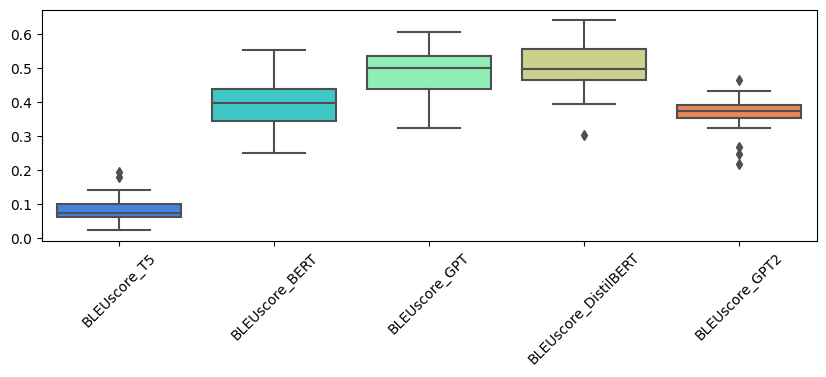

In [66]:
# Create a boxplot for different methods

plt.figure(figsize=(10, 3))
sns.boxplot(data=df_BLEU, palette='rainbow')
plt.xticks(rotation=45)

In [67]:
df.head()

,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2
0,0.126316,0.237037,0.172662,0.251572,0.141935
1,0.283186,0.210526,0.226415,0.230769,0.168831
2,0.137255,0.205479,0.219355,0.236842,0.173333
3,0.349515,0.246575,0.293333,0.324675,0.205479
4,0.247619,0.323077,0.367089,0.379747,0.211921


In [68]:
df['text']= text_data['text']

In [69]:
df.head()

,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2,text
0,0.126316,0.237037,0.172662,0.251572,0.141935,The United States is one of the last bodies th...
1,0.283186,0.210526,0.226415,0.230769,0.168831,Creating a thumbnail to represent a video is a...
2,0.137255,0.205479,0.219355,0.236842,0.173333,We all love beautifully styled form controls b...
3,0.349515,0.246575,0.293333,0.324675,0.205479,Form validation has always been my least favor...
4,0.247619,0.323077,0.367089,0.379747,0.211921,It's one thing to know about what's in the bro...


In [70]:
#Move last Column to First Column
new_cols = ["text","f_rouge_1_T5","f_rouge_1_BERT","f_rouge_1_GPT","f_rouge_1_DistilBERT","f_rouge_1_GPT2"]
df=df[new_cols]
df.head()

,text,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2
0,The United States is one of the last bodies th...,0.126316,0.237037,0.172662,0.251572,0.141935
1,Creating a thumbnail to represent a video is a...,0.283186,0.210526,0.226415,0.230769,0.168831
2,We all love beautifully styled form controls b...,0.137255,0.205479,0.219355,0.236842,0.173333
3,Form validation has always been my least favor...,0.349515,0.246575,0.293333,0.324675,0.205479
4,It's one thing to know about what's in the bro...,0.247619,0.323077,0.367089,0.379747,0.211921


In [95]:
def length(text):
    return len(text.split())

In [96]:
length(df['text'][0])

536

In [97]:
df['Length'] = df['text'].apply(length)

In [98]:
df.head()

,text,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2,Length,Average_Word_Length,freqVerbs,freqNouns
0,The United States is one of the last bodies th...,0.126316,0.237037,0.172662,0.251572,0.141935,536,5.048507,0.113879,0.483986
1,Creating a thumbnail to represent a video is a...,0.283186,0.210526,0.226415,0.230769,0.168831,298,5.124161,0.153465,0.460396
2,We all love beautifully styled form controls b...,0.137255,0.205479,0.219355,0.236842,0.173333,326,5.199387,0.136585,0.468293
3,Form validation has always been my least favor...,0.349515,0.246575,0.293333,0.324675,0.205479,443,5.207675,0.122744,0.501805
4,It's one thing to know about what's in the bro...,0.247619,0.323077,0.367089,0.379747,0.211921,325,4.960000,0.146893,0.384181


In [99]:
np.mean([len(x) for x in df['text'][0].split()])

5.048507462686567

In [100]:
def mean_word(text):
    mylist=[]
    for x in (text.split()):
        mylist.append(len(x))
    return np.mean(mylist)

In [101]:
df['Average_Word_Length'] = df['text'].apply(mean_word)

In [102]:
df.head()

,text,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2,Length,Average_Word_Length,freqVerbs,freqNouns
0,The United States is one of the last bodies th...,0.126316,0.237037,0.172662,0.251572,0.141935,536,5.048507,0.113879,0.483986
1,Creating a thumbnail to represent a video is a...,0.283186,0.210526,0.226415,0.230769,0.168831,298,5.124161,0.153465,0.460396
2,We all love beautifully styled form controls b...,0.137255,0.205479,0.219355,0.236842,0.173333,326,5.199387,0.136585,0.468293
3,Form validation has always been my least favor...,0.349515,0.246575,0.293333,0.324675,0.205479,443,5.207675,0.122744,0.501805
4,It's one thing to know about what's in the bro...,0.247619,0.323077,0.367089,0.379747,0.211921,325,4.960000,0.146893,0.384181


In [103]:
import spacy
# nlp = spacy.load('en_core_web_sm')

In [104]:
nlp = spacy.load('en_core_web_sm')

In [105]:
df['text'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)
df = df.reset_index()

# Remove text if lenght is less than 200
df = df.loc[df.text.str.len() > 200].reset_index(drop=True)

# function to clean data

#lower case
#remove stop words
#lemmatization

def cleanData(doc):
    doc = doc.lower()
    doc = nlp(doc)
    tokens = [tokens.lower_ for tokens in doc]
    tokens = [tokens for tokens in doc if (tokens.is_stop == False)]
    tokens = [tokens for tokens in tokens if (tokens.is_punct == False)]
    final_token = [token.lemma_ for token in tokens]
    
    return " ".join(final_token)

In [106]:
df= df.drop(['index'],axis=1)

In [107]:
df['clean'] = df.apply(lambda row:cleanData (row['text']),axis=1)

In [108]:
#function to POS tagging
def POS(clean):
    pos_list=[]
    clean = nlp(clean)
    for token in clean:
        pos_list.append(token.pos_)
    return(pos_list) 

In [109]:
df['pos_tag'] = df.apply(lambda row:POS (row['clean']),axis=1)

In [110]:
from collections import Counter

In [111]:
def find_no_class(count, class_name = ""):
    total = 0
    for key in count.keys():
        if key.startswith(class_name):
            total += count[key]
            
            
    return total

def get_classes(row, grammatical_class = ""):
    count = Counter(row["pos_tag"])
    return find_no_class(count, class_name = grammatical_class)/len(row["pos_tag"])

#df["freqAdverbs"] = df.apply(lambda row: get_classes(row, "RB"), axis = 1)
df["freqVerbs"] = df.apply(lambda row: get_classes(row, "VERB"), axis = 1)
#df["freqAdjectives"] = df.apply(lambda row: get_classes(row, "JJ"), axis = 1)
df["freqNouns"] = df.apply(lambda row: get_classes(row, "NOUN"), axis = 1)

df.sample(5)

,text,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2,Length,Average_Word_Length,freqVerbs,freqNouns,clean,pos_tag
9,Reacting to events with JavaScript is the foun...,0.170732,0.369748,0.307692,0.388060,0.175182,332,5.346386,0.149485,0.448454,react event javascript foundation dynamic expe...,"[VERB, NOUN, NOUN, PROPN, ADJ, NOUN, NOUN, SPA..."
3,Form validation has always been my least favor...,0.349515,0.246575,0.293333,0.324675,0.205479,443,5.207675,0.122744,0.501805,form validation favorite web development need ...,"[VERB, NOUN, ADJ, NOUN, NOUN, VERB, ADJ, NOUN,..."
19,Media queries provide a great way to programma...,0.201681,0.312057,0.297619,0.299401,0.166667,322,5.338509,0.103093,0.494845,medium query provide great way programmaticall...,"[ADJ, NOUN, VERB, ADJ, NOUN, ADV, VERB, NOUN, ..."
26,\nJava is ranked as one of the worldâs most ...,0.287500,0.265193,0.251256,0.272727,0.210526,1881,5.181818,0.160209,0.489005,\n java rank worldâs widely programming lang...,"[SPACE, PROPN, PROPN, VERB, ADV, VERB, NOUN, N..."
22,The JavaScript Methods for Searching Strings t...,0.297297,0.261364,0.343195,0.429379,0.157303,765,5.627451,0.163551,0.595794,javascript method search string tutorial prese...,"[NOUN, PROPN, NOUN, NOUN, NOUN, ADJ, ADJ, NOUN..."


In [112]:
df = df.drop(['pos_tag','clean'],axis=1)

In [113]:
df.head()

,text,f_rouge_1_T5,f_rouge_1_BERT,f_rouge_1_GPT,f_rouge_1_DistilBERT,f_rouge_1_GPT2,Length,Average_Word_Length,freqVerbs,freqNouns
0,The United States is one of the last bodies th...,0.126316,0.237037,0.172662,0.251572,0.141935,536,5.048507,0.113879,0.483986
1,Creating a thumbnail to represent a video is a...,0.283186,0.210526,0.226415,0.230769,0.168831,298,5.124161,0.153465,0.460396
2,We all love beautifully styled form controls b...,0.137255,0.205479,0.219355,0.236842,0.173333,326,5.199387,0.136585,0.468293
3,Form validation has always been my least favor...,0.349515,0.246575,0.293333,0.324675,0.205479,443,5.207675,0.122744,0.501805
4,It's one thing to know about what's in the bro...,0.247619,0.323077,0.367089,0.379747,0.211921,325,4.960000,0.146893,0.384181


In [115]:
# df.to_csv('file2.csv',index=False)